## Введение в машинное обучение

### Домашнее задание №2

Задание выполнил(а): Лунева Полина

Домашнее задание включает реализацию алгоритмов kNN и линейной регрессии, решение задач регрессии, а также теоретических задач


# kNN своими руками (5)

В этом задании вам предстоит реализовать взвешенный алгоритм kNN для регрессии. Пусть необходимо вычислить значение $y$ для некоторого $x$ при известных данных $\left(x_1, y_1\right), \ldots, \left(x_\ell, y_\ell\right)$. Предсказанием вашего регрессора будет являться

$$
\hat{y} = \frac{\sum\limits_{i=1}^kw_iy_{(i)}}{\sum\limits_{i=1}^kw_i},
$$
где $\left(x_{(1)}, y_{(1)}\right), \ldots, \left(x_{(k)}, y_{(k)}\right)$ - ближайшие $k$ объектов к $x$ по некоторой метрике $d(\cdot, \cdot)$. Ваш алгоритм должен уметь работать с двумя метриками:

$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_2 = \sqrt{\sum\limits_{j=1}^n\left(x_{(i)}^j - x^j\right)^2}\qquad\text{(евклидова)}
$$
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_1 = \sum\limits_{j=1}^n\left|x_{(i)}^j - x^j\right|\qquad\text{(манхэттена)}
$$

### Реализуйте две функции расстояния (1 балл)
- евклидова метрика **(0.5 балла)**
- метрика Манхэттена **(0.5 балла)**

Обе функции должны на вход получать матрицу `np.array of shape(n, m)` и вектор `np.array of shape(m,)`, а возвращать вектор расстояний от каждой строчки матрицы до вектора `np.array of shape(n,)`

**В данном пункте запрещено использование циклов for, while. Пользуйтесь возможностями numpy.** 

In [366]:
import numpy as np

In [367]:
def euclidian_metric(X, x):
    distances = (np.sum((X - x) ** 2, axis=1)) ** 0.5
    return distances

# Использование встроенных функций для возведения в степень и извлечения корня:
def euclidian_metric_1(X, x):
    distances = np.sqrt(np.sum(np.square(X - x), axis=1))
    return distances

# Использование встроенной функции для поиска Евклидова расстояния:
def euclidian_metric_2(X, x):
    distances = np.linalg.norm(X - x, ord=2, axis=1)
    return distances

def manhattan_metric(X, x):
    distances = np.sum(np.absolute(X - x), axis=1)
    return distances

# Использование встроенной функции для поиска расстояния Манхэттена:
def manhattan_metric_2(X, x):
    distances = np.linalg.norm(X - x, ord=1, axis=1)
    return distances

In [368]:
# проверка
X = np.array([[1, 2, 3], [5, 6, 7], [8, 9, 10]])
y = np.ones(3)

assert np.allclose(euclidian_metric(X, y), np.array([ 2.23606798,  8.77496439, 13.92838828]))
assert np.allclose(manhattan_metric(X, y), np.array([ 3., 15., 24.]))

### Реализуйте алгоритм kNN для регрессии (4 балла)

- реализуйте класс kNN для равномерных весов (то есть $w_1 = \ldots = w_k$) **(3 балла)**
- добавьте возможность передать данному классу параметр `weights='distance'` для вызова взвешенной версии алгоритма kNN (то есть $w_i = \frac{1}{d\left(x, x_{(i)}\right)}$ **(1 балл)**

In [369]:
class KNN:
    def __init__(self, metric='euclid', k=5, weights='uniform'):
        """
        PARAMETERS:
        metric ('euclid' or 'manhattan')
        k - number of nearest neighbors
        """

        self.metric = metric
        self.k = k
        self.weights = weights
        
        self.X_train = None
        self.y_train = None
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (n, d)
        y_train - np.array of shape (n,)
        """

        self.X_train = X_train
        self.y_train = y_train

    # Функция fit модифицирована в fit_1, которая возвращает self:
    def fit_1(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        return self
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        
        self.X_test = X_test
        y_pred = np.array([])
        weights = np.array([])
        # Если используется Евклидова метрика:
        
        for i in self.X_test:
            if self.metric == 'euclid':
                # Расстояния от объектов обучающей выборки до нового объекта по Евклидовой метрике:
                distances = euclidian_metric(self.X_train, i)
            elif self.metric == 'manhattan':
                # Расстояния от объектов обучающей выборки до нового объекта по метрике Манхэттена:
                distances = manhattan_metric(self.X_train, i)   
            # Отсортированные объекты обучающей выборки по расстоянию до нового объекта и их индексы до k-го элемента:
            distances_sorted = np.sort(distances)[:self.k]
            distance_indexes_sorted = np.argsort(distances)[:self.k]
            # Если веса распределены равномерно, усредняем ответы:
            if self.weights == 'uniform':
                y_pred = np.append(y_pred, np.mean(self.y_train[distance_indexes_sorted]))
            # Если веса распределены неравномерно, находим средневзвешенное значение:
            elif self.weights == 'distance':
                weights = 1 / distances_sorted
                y_pred = np.append(y_pred, np.dot(self.y_train[distance_indexes_sorted], weights) / np.sum(weights))
        return y_pred

Сверьте для нескольких комбинаций различных гиперпараметров свой результат на искусственной выборке с результатом соответствующего алгоритма из `sklearn`. **Не забудьте про гиперпараметр `weights`.**

In [370]:
np.random.seed(13)
X_train = np.random.randn(1000, 50)
y_train = np.random.randn(1000,)
X_test = np.random.randn(500, 50)
y_test = np.random.randn(500,)

In [371]:
from sklearn.neighbors import KNeighborsRegressor as KNR
print('Встроенная функция для 5 соседей и равномерных весов (Евклидова метрика):', 
      KNR().fit(X_train, y_train).predict(X_test))

# Данные параметры заданы по дефолту
# В данной проверке полный список значений, однако далее будут по 10 (для удобного чтения)

Встроенная функция для 5 соседей и равномерных весов (Евклидова метрика): [ 0.06636214 -0.31740257  0.04780024  0.70402465 -0.41993568  0.72820592
 -0.09201978 -0.09269811 -0.26511057 -0.75312651  0.29558884 -0.28913479
 -0.28193325 -0.1480273  -0.04563558 -0.71262895  0.56728963 -0.57726377
 -0.68095813 -0.06371832 -1.1074085   0.46643321 -0.01458612  0.4166867
  0.24101621 -0.09797396  0.35521728 -0.14542946 -0.02645758 -0.0801689
  0.55608044  0.20020936 -0.06469001 -0.27684441  0.03278809 -0.2595978
  0.14539725 -0.42487596  0.10693868 -0.74316     0.72592048  0.52721137
  0.17720116  0.34569524 -0.72158337 -0.27984113 -0.38371445 -0.31071737
 -0.17501856 -0.75302709  0.11589968 -0.49667945 -0.22147003  0.07516501
  0.15508336  0.10166385 -0.47089339  1.07125027  0.29703159  0.11577055
 -0.1667352  -0.40187426 -0.70020699  0.22635489  0.13604066 -0.7724717
 -0.79677688  0.64467878  0.49710689 -0.27407321  0.07878947  0.06631425
  0.0970818  -0.15712757 -0.20411704  0.03700014  0.01

In [372]:
knn = KNN()
knn.fit(X_train, y_train)
print('Моя функция для 5 соседей и равномерных весов (Евклидова метрика):', 
      knn.predict(X_test))

# Данные параметры заданы в функции
# В данной проверке полный список значений, однако далее будут по 10 (для удобного чтения)

Моя функция для 5 соседей и равномерных весов (Евклидова метрика): [ 0.06636214 -0.31740257  0.04780024  0.70402465 -0.41993568  0.72820592
 -0.09201978 -0.09269811 -0.26511057 -0.75312651  0.29558884 -0.28913479
 -0.28193325 -0.1480273  -0.04563558 -0.71262895  0.56728963 -0.57726377
 -0.68095813 -0.06371832 -1.1074085   0.46643321 -0.01458612  0.4166867
  0.24101621 -0.09797396  0.35521728 -0.14542946 -0.02645758 -0.0801689
  0.55608044  0.20020936 -0.06469001 -0.27684441  0.03278809 -0.2595978
  0.14539725 -0.42487596  0.10693868 -0.74316     0.72592048  0.52721137
  0.17720116  0.34569524 -0.72158337 -0.27984113 -0.38371445 -0.31071737
 -0.17501856 -0.75302709  0.11589968 -0.49667945 -0.22147003  0.07516501
  0.15508336  0.10166385 -0.47089339  1.07125027  0.29703159  0.11577055
 -0.1667352  -0.40187426 -0.70020699  0.22635489  0.13604066 -0.7724717
 -0.79677688  0.64467878  0.49710689 -0.27407321  0.07878947  0.06631425
  0.0970818  -0.15712757 -0.20411704  0.03700014  0.01455598 

In [373]:
# Использование функции fit_1:
print('Моя функция для 5 соседей и равномерных весов (Евклидова метрика):', 
      KNN().fit_1(X_train, y_train).predict(X_test))

# Данные параметры заданы в функции
# В данной проверке полный список значений, однако далее будут по 10 (для удобного чтения)

Моя функция для 5 соседей и равномерных весов (Евклидова метрика): [ 0.06636214 -0.31740257  0.04780024  0.70402465 -0.41993568  0.72820592
 -0.09201978 -0.09269811 -0.26511057 -0.75312651  0.29558884 -0.28913479
 -0.28193325 -0.1480273  -0.04563558 -0.71262895  0.56728963 -0.57726377
 -0.68095813 -0.06371832 -1.1074085   0.46643321 -0.01458612  0.4166867
  0.24101621 -0.09797396  0.35521728 -0.14542946 -0.02645758 -0.0801689
  0.55608044  0.20020936 -0.06469001 -0.27684441  0.03278809 -0.2595978
  0.14539725 -0.42487596  0.10693868 -0.74316     0.72592048  0.52721137
  0.17720116  0.34569524 -0.72158337 -0.27984113 -0.38371445 -0.31071737
 -0.17501856 -0.75302709  0.11589968 -0.49667945 -0.22147003  0.07516501
  0.15508336  0.10166385 -0.47089339  1.07125027  0.29703159  0.11577055
 -0.1667352  -0.40187426 -0.70020699  0.22635489  0.13604066 -0.7724717
 -0.79677688  0.64467878  0.49710689 -0.27407321  0.07878947  0.06631425
  0.0970818  -0.15712757 -0.20411704  0.03700014  0.01455598 

In [374]:
print('Встроенная функция для 7 соседей и неравномерных весов (Евклидова метрика):', 
      KNR(n_neighbors = 7, weights = 'distance').fit(X_train, y_train).predict(X_test)[:10])

# Взяты первые 10 значений для удобного чтения

Встроенная функция для 7 соседей и неравномерных весов (Евклидова метрика): [-0.21701543 -0.22825926  0.30318147  0.5967049  -0.2350278   0.38030805
  0.14233539  0.18493165 -0.17972673 -0.47416961]


In [134]:
knn = KNN(k = 7, weights = 'distance')
knn.fit(X_train, y_train)
print('Моя функция для 7 соседей и неравномерных весов (Евклидова метрика):', 
      knn.predict(X_test)[:10])

# Взяты первые 10 значений для удобного чтения

Моя функция для 7 соседей и неравномерных весов (Евклидова метрика): [-0.21701543 -0.22825926  0.30318147  0.5967049  -0.2350278   0.38030805
  0.14233539  0.18493165 -0.17972673 -0.47416961]


In [135]:
print('Встроенная функция для 5 соседей и равномерных весов (метрика Манхэттена):', 
      KNR(p = 1).fit(X_train, y_train).predict(X_test)[:10])

# Взяты первые 10 значений для удобного чтения

Встроенная функция для 5 соседей и равномерных весов (метрика Манхэттена): [-4.69962608e-01 -2.66407352e-01 -1.43054123e-01  4.73421606e-01
  6.42417760e-04  4.96018663e-01  4.26539906e-01  5.34402633e-01
 -1.51152977e-01 -6.78996863e-01]


In [136]:
knn = KNN(metric = 'manhattan')
knn.fit(X_train, y_train)
print('Моя функция для 5 соседей и равномерных весов (метрика Манхэттена):', 
      knn.predict(X_test)[:10])

# Взяты первые 10 значений для удобного чтения

Моя функция для 5 соседей и равномерных весов (метрика Манхэттена): [-4.69962608e-01 -2.66407352e-01 -1.43054123e-01  4.73421606e-01
  6.42417760e-04  4.96018663e-01  4.26539906e-01  5.34402633e-01
 -1.51152977e-01 -6.78996863e-01]


In [137]:
print('Встроенная функция для 7 соседей и неравномерных весов (метрика Манхэттена):', 
      KNR(n_neighbors = 7, weights = 'distance', p = 1).fit(X_train, y_train).predict(X_test)[:10])

# Взяты первые 10 значений для удобного чтения

Встроенная функция для 7 соседей и неравномерных весов (метрика Манхэттена): [-0.0363287  -0.3925204   0.0635233   0.28506718 -0.25494384  0.49204345
  0.22588711  0.1870891  -0.37445788 -0.67205168]


In [138]:
knn = KNN(k = 7, weights = 'distance', metric = 'manhattan')
knn.fit(X_train, y_train)
print('Моя функция для 7 соседей и неравномерных весов (метрика Манхэттена):', 
      knn.predict(X_test)[:10])

# Взяты первые 10 значений для удобного чтения

Моя функция для 7 соседей и неравномерных весов (метрика Манхэттена): [-0.0363287  -0.3925204   0.0635233   0.28506718 -0.25494384  0.49204345
  0.22588711  0.1870891  -0.37445788 -0.67205168]


# Линейная регрессия своими руками (5)

Реализуйте линейную регрессию с градиентным спуском для [функции потерь Хьюбера](https://en.wikipedia.org/wiki/Huber_loss):

$$
L_\delta\left(y, \hat{y}\right) =
\begin{cases}
\frac{1}{2}\left(y - \hat{y}\right)^2, \qquad &|y - \hat{y}| \leq \delta\\
\delta\left|y - \hat{y}\right| - \frac{1}{2}\delta^2,\qquad & \text{otherwise}
\end{cases}
$$

В таком случае общее значение функции потерь на всем датасете $(x_1, y_1), \ldots, (x_\ell, y_\ell)$ будет равно

$$
L = \frac{1}{\ell}\sum\limits_{i=1}^\ell L_\delta\left(y_i, \hat{y}_i\right)
$$

*Чему будет равен градиент этой функции по $w$? Вспомните, что за вектор $\hat{y}$ и как он зависит от $X$ и $w$.*

Эти ссылки могут показаться вам полезными:
- https://github.com/esokolov/ml-course-hse/blob/master/2019-fall/lecture-notes/lecture02-linregr.pdf
- https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
- https://stats.stackexchange.com/questions/312737/mean-absolute-error-mae-derivative

In [375]:
import matplotlib.pyplot as plt

%matplotlib inline

### Реализуйте функцию потерь Хьюбера для одного примера и ее градиент по весам (1.5 балла)

- функция потерь **(0.5 балла)**
- градиент **(1 балл)**

**В данном пункте запрещено использование циклов for, while. Пользуйтесь возможностями numpy. Однако можно использовать оператор if.**

In [376]:
def huber_loss(x, y, w, delta):
    """
    x - np.array shape=(d,)
    y - scalar
    w - np.array shape=(d,)
    delta - scalar
    
    OUTPUT:
    loss - scalar
    """
    # np.dot(x, w) = np.sum(x * w)
    z = np.dot(x, w) - y
    if np.absolute(z) <= delta:
        loss = np.square(z) / 2
    else:
        loss = delta * (np.absolute(z) - np.square(delta) / 2)
    return loss


def huber_grad(x, y, w, delta):
    """
    INPUT:
    x - np.array shape=(d,)
    y - scalar
    w - np.array shape=(d,)
    delta - scalar
    
    OUTPUT:
    grad - np.array shape=(d,)
    """
    z = np.dot(x, w) - y
    if np.absolute(z) <= delta:
        grad = x * z
    else:
        grad = x * delta * np.sign(z)
    return grad

In [377]:
# проверка

x = np.array([1, 2, 3])
w = np.array([3, 5, 12])
y = 19
delta = 1

assert huber_loss(x, y, w, delta) == 29.5
assert np.allclose(huber_grad(x, y, w, delta), np.array([1, 2, 3]))

y = 49.2

assert np.allclose(huber_loss(x, y, w, delta), 0.02000000000000057)
assert np.allclose(huber_grad(x, y, w, delta), np.array([-0.2, -0.4, -0.6]))

### Реализуйте линейную регрессию (3.5 балла)

*Вы можете опустить единичный признак в модели и не добавлять его в данные. Для данной искусственной выборки это не актуально, потому что целевая переменная в этом случае является случайной величиной из стандартного нормального распределения со средним 0.*

*Вектор весов в градиентном спуске можете инициализировать нулями.*

In [522]:
class LinearRegressionHuber:
    def __init__(self, delta=1.0, max_iter=1000, tol=1e-6, eta=1e-2):
        """
        PARAMETERS:
        delta - scalar in Huber loss
        max_iter - maximum possible number of iterations in Gradient Descent
        tol - precision for stopping criterion in Gradient Descent
        eta - step size in Gradient Descent (learning rate)
        """

        self.delta = delta
        self.max_iter = max_iter
        self.tol = tol
        self.eta = eta
        
        self.w = None
        self.w0 = None
        self.loss_history = None
        
    def fit(self, X, y):
        """
        INPUT:
        X_train - np.array of shape (n, d)
        y_train - np.array of shape (n,)
        
        В этой функции вы должны инициализировать веса (можно нулями), а также 
        итерационно обновлять веса с помощью 
        градиентного спуска (считать и запоминать лосс (значение функции потерь) будет хорошим решением)
        """

        # Инициализация рандомными числами: 
        self.w = np.random.random(X.shape[1])
        self.w0 = np.random.random(len(y))
        # Также можно инициализировать веса нулями (в теории при инициализации нулями может происходить "топтание на месте", однако у меня этого не произошло):
        self.loss_history = []
        for i in range(self.max_iter):
            loss = self.calc_loss(X, y)
            if len(self.loss_history) > 1 and np.absolute(loss - self.loss_history[-1]) < self.tol:
                return self.loss_history
            grad_w, grad_w0 = self.calc_gradient(X, y)
            self.loss_history.append(loss)
            self.w -= self.eta * grad_w
            self.w0 -= self.eta * grad_w0
        return self.loss_history
    
    def fit_1(self, X, y):
        """
        INPUT:
        X_train - np.array of shape (n, d)
        y_train - np.array of shape (n,)
        
        В этой функции вы должны инициализировать веса (можно нулями), а также 
        итерационно обновлять веса с помощью 
        градиентного спуска (считать и запоминать лосс (значение функции потерь) будет хорошим решением)
        """

        # Также можно инициализировать веса нулями (в теории при инициализации нулями может происходить "топтание на месте", однако у меня этого не произошло):
        self.w = np.zeros(X.shape[1])
        self.w0 = np.zeros(len(y))
        self.loss_history = []
        for i in range(self.max_iter):
            loss = self.calc_loss(X, y)
            if len(self.loss_history) > 1 and np.absolute(loss - self.loss_history[-1]) < self.tol:
                return self.loss_history
            grad_w, grad_w0 = self.calc_gradient(X, y)
            self.loss_history.append(loss)
            self.w -= self.eta * grad_w
            self.w0 -= self.eta * grad_w0
        return self.loss_history
        
    def predict(self, X):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        
        Предскажите ответы с помощью обученных весов
        """
        
        y_pred = X * self.w + w0
        return y_pred
    
    def calc_gradient(self, X, y):
        """
        Calculates the gradient of Huber loss by weights.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        grad - np.array of shape (d,)
        
        Посчитайте градиент как среднее от градиентов для каждого примера
        """
                
        # Формула с сайта, предложенного для задания:
        y_1 = np.dot(X, self.w) + self.w0
        grad_w = -2 * np.mean(X.T * (y - y_1))
        grad_w0 = -2 * np.mean(y - y_1)
        return grad_w, grad_w0
    
    def calc_loss(self, X, y):
        """
        Calculates the Huber loss.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        loss - float
        
        Посчитайте loss по выборке как среднее loss'ов для каждого 
        примера
        """

        loss = np.zeros_like(y)
        z = np.dot(X, self.w) + self.w0 - y
        loss = np.where(np.absolute(z) <= self.delta, np.square(z) / 2, 
                        self.delta * (np.absolute(z) - np.square(self.delta) / 2))
        # Формула использована из функции, однако не вызвана функция huber_loss, так как разделены w и w0
        loss = np.mean(loss)
        return loss

Проверьте работу вашего метода: выведите результаты его работы на той же искусственной выборке, что и в задаче выше (в качестве метрик качества используйте MSE и Huber loss). Постройте график зависимости значения функции потерь от итерации градиентного спуска.

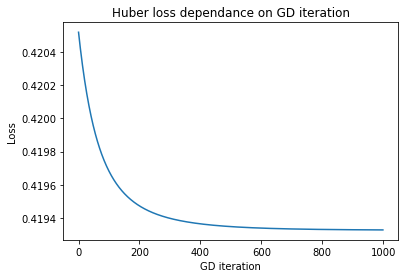

In [500]:
plt.plot(np.arange(len(loss_history)), loss_history)
plt.title('Huber loss dependance on GD iteration')
plt.xlabel('GD iteration')
plt.ylabel('Loss')
plt.show()

In [513]:
lrh_1 = LinearRegressionHuber()
loss_history_1 = lrh_1.fit(X_train, y_train)
y_pred_1 = lrh_1.predict(X_test)
lrh_1.predict(X_test)[:10]

array([ 0.00571164,  0.00828742,  0.06805248, -0.00086633,  0.07421688,
        0.09555064,  0.0351852 ,  0.03178228, -0.09472391,  0.0214465 ])

In [516]:
from sklearn.linear_model import HuberRegressor
hb = HuberRegressor()
loss_hist = hb.fit(X_train, y_train)
y_pred_hg = hb.predict(X_test)
hb.predict(X_test)[:10]
# Первые 10 значений

array([-0.54752822,  0.09657208,  0.13428198, -0.08807096,  0.16872349,
        0.53957355,  0.09956427,  0.1081482 ,  0.11394221,  0.02822136])

In [514]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_1)

1.0764163977813928

In [517]:
mean_squared_error(y_test, y_pred_hg)

1.1618370021918623

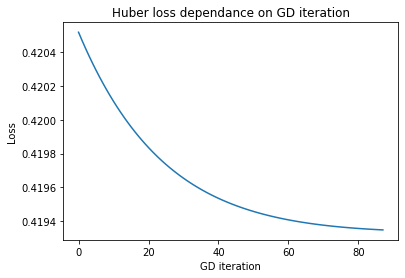

In [153]:
plt.plot(np.arange(len(loss_history_1)), loss_history_1)
plt.title('Huber loss dependance on GD iteration')
plt.xlabel('GD iteration')
plt.ylabel('Loss')
loss_history_1 = lrh_1.fit(X_train, y_train)
y_pred_1 = lrh_1.predict(X_test)plt.show()

In [470]:
hb = HuberRegressor()
hb.fit(X_train, y_train).predict(X_test)[:10]
# Первые 10 значений

array([-0.54752822,  0.09657208,  0.13428198, -0.08807096,  0.16872349,
        0.53957355,  0.09956427,  0.1081482 ,  0.11394221,  0.02822136])

In [464]:
class LinearRegressionHuber_2:
    def __init__(self, delta=1.0, max_iter=1000, tol=1e-6, eta=1e-2):
        """
        PARAMETERS:
        delta - scalar in Huber loss
        max_iter - maximum possible number of iterations in Gradient Descent
        tol - precision for stopping criterion in Gradient Descent
        eta - step size in Gradient Descent (learning rate)
        """

        self.delta = delta
        self.max_iter = max_iter
        self.tol = tol
        self.eta = eta
        
        self.w = None
        self.loss_history = None
        
    def fit(self, X, y):
        """
        INPUT:
        X_train - np.array of shape (n, d)
        y_train - np.array of shape (n,)
        
        В этой функции вы должны инициализировать веса (можно нулями), а также 
        итерационно обновлять веса с помощью 
        градиентного спуска (считать и запоминать лосс (значение функции потерь) будет хорошим решением)
        """

        # Инициализация нулями: 
        self.w = np.zeros(X.shape[1])
        self.loss_history = np.array([])
        for i in range(self.max_iter):
            loss = self.calc_loss(X, y)
            if len(self.loss_history) > 1 and np.absolute(loss - self.loss_history[-1]) < self.tol:
                return self.loss_history
            grad = self.calc_gradient(X, y)
            self.loss_history = np.append(self.loss_history, loss)
            self.w -= self.eta * grad
        return self.loss_history

     
    def predict(self, X):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        
        Предскажите ответы с помощью обученных весов
        """
        # np.dot(X, self.w) = np.sum(X * self.w)
        y_pred = np.dot(X, self.w)
        return y_pred
    
    
    def calc_gradient(self, X, y):
        """
        Calculates the gradient of Huber loss by weights.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        grad - np.array of shape (d,)
        
        Посчитайте градиент как среднее от градиентов для каждого примера
        """
        gradients = np.array([])
        for i in range(X.shape[0]):
            gradients = np.append(gradients, huber_grad(X[i], y[i], self.w, self.delta))
        grad = np.mean(gradients)
        return grad

    
    def calc_loss(self, X, y):
        """
        Calculates the Huber loss.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        loss - float
        
        Посчитайте loss по выборке как среднее loss'ов для каждого 
        примера
        """
        losses = np.array([])
        for i in range(X.shape[0]):
            losses = np.append(losses, huber_loss(X[i], y[i], self.w, self.delta))
        loss = np.mean(losses)
        return loss

In [523]:
lrh_2 = LinearRegressionHuber_2()
loss_history_2 = lrh_2.fit(X_train, y_train)
y_pred_2 = lrh_2.predict(X_test)

In [524]:
mean_squared_error(y_test, y_pred_2)

1.0767448154138115

In [525]:
mean_squared_error(y_test, y_pred_hg)

1.1618370021918623

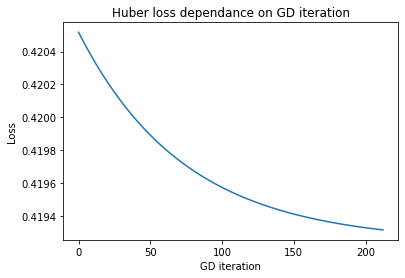

In [467]:
plt.plot(np.arange(len(loss_history_2)), loss_history_2)
plt.title('Huber loss dependance on GD iteration')
plt.xlabel('GD iteration')
plt.ylabel('Loss')
plt.show()

# Практика (8)

Пожалуйста, при использовании различных функций из библиотек импортируйте все, что вам понадобилось в данной части, в следующем блоке:

In [197]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

%matplotlib inline

В этой части вы поработаете с уже знакомыми вам данными из другого соревнования на Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques. Задача - предсказание цены дома.

In [3]:
data = pd.read_csv('train.csv', header=0)

In [955]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [956]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,...,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,...,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,...,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,...,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,...,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 0 (0.5)

Если в данных бессмысленные столбцы? Если да, избавьтесь от них и обоснуйте свое решение.

In [957]:
# Столбцы, имеющие корреляцию больше 0.75:
data.corr().unstack().sort_values(ascending=False).head(50)[data.corr().unstack() > 0.75][data.corr().unstack() < 1]

# Используется условие, что корреляция меньше 1, так как корреляция, равная 1, у столцов с самими же собой
# Один из столбцов с высокой корреляцией следует удалить, так как это случай мультиколлинеарности

GarageArea    GarageCars      0.882475
GarageCars    GarageArea      0.882475
GarageYrBlt   YearBuilt       0.825667
YearBuilt     GarageYrBlt     0.825667
GrLivArea     TotRmsAbvGrd    0.825489
TotRmsAbvGrd  GrLivArea       0.825489
1stFlrSF      TotalBsmtSF     0.819530
TotalBsmtSF   1stFlrSF        0.819530
OverallQual   SalePrice       0.790982
SalePrice     OverallQual     0.790982
dtype: float64

<AxesSubplot:>

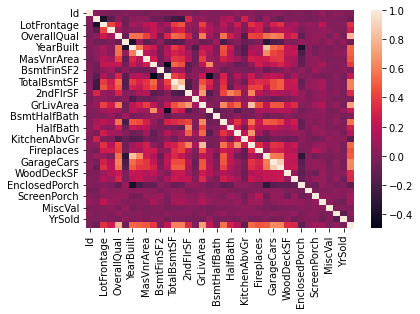

In [958]:
# Для наглядности построена тепловая карта:
sns.heatmap(data.corr())

In [4]:
data = data.drop(columns=['GarageCars', 'GarageYrBlt', 'TotRmsAbvGrd', '1stFlrSF'])
data

# Лучше брать не 75, а 80%, одднако я решила проверить, есть ли признаки, коррелирующие почти на 80%.
# Оказалось, что да, однако не стоит удалять один из этих признаков, так как в других пунктах потребуется удаление одного из них ('SalePrice').
# Показаны первые 5 и последние 5 строк, и это позволяет убедиться, что бесполезные для анализа столбцы удалены

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [960]:
# Столбцы типа object, количество и процент их значений:
data_object = data.select_dtypes(include=['object']).columns
for i in data_object:
    print(i)
    print(data[i].value_counts().sort_values(ascending=False))
    print((data[i].value_counts() / sum(data[i].value_counts())).sort_values(ascending=False))
    print()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64

Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64

Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64
Grvl    0.549451
Pave    0.450549
Name: Alley, dtype: float64

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64

Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64

L

In [961]:
# Столбцы типа object, количество и процент их значений, где процент какого-то из значений больше 95%:
for i in ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'GarageQual', 'GarageCond']:
    print(i)
    print((data[i].value_counts() / sum(data[i].value_counts())).sort_values(ascending=False))
    print()

Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64

Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64

Condition2
Norm      0.989726
Feedr     0.004110
Artery    0.001370
RRNn      0.001370
PosN      0.001370
PosA      0.000685
RRAn      0.000685
RRAe      0.000685
Name: Condition2, dtype: float64

RoofMatl
CompShg    0.982192
Tar&Grv    0.007534
WdShngl    0.004110
WdShake    0.003425
Metal      0.000685
Membran    0.000685
Roll       0.000685
ClyTile    0.000685
Name: RoofMatl, dtype: float64

Heating
GasA     0.978082
GasW     0.012329
Grav     0.004795
Wall     0.002740
OthW     0.001370
Floor    0.000685
Name: Heating, dtype: float64

GarageQual
TA    0.950689
Fa    0.034808
Gd    0.010152
Ex    0.002175
Po    0.002175
Name: GarageQual, dtype: float64

GarageCond
TA    0.961566
Fa    0.025381
Gd    0.006526
Po    0.005076
Ex    0.001450
Name: GarageCond, dtype: float64



In [5]:
data = data.drop(columns=['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'GarageQual', 'GarageCond'])
data

# Такие столбцы можно удалить, так как слишком большая их часть имеет одно и то же значение, поэтому другие значения могут казаться выбросами

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,NaN,Reg,Lvl,Inside,Gtl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,NaN,Reg,Lvl,FR2,Gtl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,NaN,IR1,Lvl,Inside,Gtl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,NaN,IR1,Lvl,Corner,Gtl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,NaN,IR1,Lvl,FR2,Gtl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,NaN,Reg,Lvl,Inside,Gtl,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,NaN,Reg,Lvl,Inside,Gtl,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,NaN,Reg,Lvl,Inside,Gtl,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,NaN,Reg,Lvl,Inside,Gtl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [707]:
# Id может быть полезен для идентификации
# Не стоит удалять слишком много столбцов, так как много строк (большое количество данных), поэтому такое количество столбцов нормально

## 1 (0.5)

Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

In [963]:
pd.isnull(data).any().any()

# В данных есть пропуски

True

In [964]:
# Количество пропусков для каждого столбца:
data.isnull().sum()[data.isnull().sum() != 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [965]:
# Доля пропусков от общего числа значений для каждого столбца:
(pd.isnull(data).sum()[data.isnull().sum() != 0]/data.shape[0]).sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageFinish    0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrType      0.005479
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

In [966]:
# Второй вариант:

print('Размер таблицы:', data.shape)

# Размер таблицы нужен для определения количества столбцов

Размер таблицы: (1460, 70)


In [967]:
# Количество пропусков для каждого столбца:
pd.isnull(data).sum().sort_values(ascending=False).head(20)

# Сортировка столбцов по убыванию количества пропусков нужна, чтобы увидеть все столбцы с пропусками, так как столбцов много
# Видно, что пропуски есть в 16 столбцах, и специально взяты первые 20 столбцов для демонстрации, что далее пропусков в столбцах нет

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrType         8
MasVnrArea         8
Electrical         1
BedroomAbvGr       0
HalfBath           0
FullBath           0
BsmtHalfBath       0
dtype: int64

In [968]:
# Доля пропусков от общего числа значений для каждого столбца:
(pd.isnull(data).sum()/data.shape[0]).sort_values(ascending=False).head(20)

# Общее число значений считается как количество строк таблицы для учета столбцов с пропущенным значением
# Сортировка столбцов по убыванию количества пропусков нужна, чтобы увидеть все столбцы с пропусками, так как столбцов много
# Видно, что пропуски есть в 19 столбцах, и специально взяты первые 20 столбцов для демонстрации, что далее пропусков в столбцах нет

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageFinish    0.055479
GarageType      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrType      0.005479
MasVnrArea      0.005479
Electrical      0.000685
BedroomAbvGr    0.000000
HalfBath        0.000000
FullBath        0.000000
BsmtHalfBath    0.000000
dtype: float64

In [969]:
# Третий вариант:

# Количество пропусков для каждого столбца:
pd.isnull(data).sum().sort_values(ascending=False)[pd.isnull(data).sum() > 0]

# Используется условие, что сумма пропусков больше нуля

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrType         8
MasVnrArea         8
Electrical         1
dtype: int64

In [970]:
# Доля пропусков от общего числа значений для каждого столбца:
(pd.isnull(data).sum()[pd.isnull(data).sum() > 0]/data.shape[0]).sort_values(ascending=False)

# Используется условие, что сумма пропусков больше нуля

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageFinish    0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrType      0.005479
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

## 2 (0.5)

Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение. **Проверьте, что вы действительно избавились от пропусков.**

*Напоминание. В зависимости от типа столбца, можно заполнить пропуски, например, средним арифметическим, медианой, модой, можно какими-то отдельными значениями. А можно такие столбцы вообще удалить.*

In [971]:
# Столбцы, имеющие больше 80% пропущенных значений:
(pd.isnull(data).sum()/data.shape[0])[pd.isnull(data).sum()/data.shape[0] > 0.8].sort_values(ascending=False)

# Такие столбцы следует удалить, так как в них больше 80% пропущенных значений, замена которых приведет к искажению данных

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
dtype: float64

In [6]:
# Удаление столбцов, имеющих больше 80% пропущенных значений:
data = data.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'Sale

In [973]:
data['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [7]:
# Так как самое большое количество значений "Gd", то можно было бы заменить пропуски на это значение,
# однако пропущена почти половина значений, поэтому следует выбрать какое-то среднее, нейтральное значение - "TA" (разница с "Gd" небольшая)
data['FireplaceQu'].fillna('TA', inplace=True)

In [8]:
data['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [9]:
data['LotFrontage'].mean()

70.04995836802665

In [10]:
data['LotFrontage'].median()

69.0

In [11]:
# Так как все заполненные значения целые, то следует взять медианное значение для заполнения пропусков, которых не так много (меньше 20%):
data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)

In [12]:
data['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [13]:
# Так как пропущенных значений всего 5,5%, то можно заменить их на самое популярное значение - "Attchd":
data['GarageType'].fillna('Attchd', inplace=True)

In [14]:
data['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [15]:
# Так как пропущенных значений всего 5,5%, то можно заменить их на самое популярное значение - "Unf":
data['GarageFinish'].fillna('Unf', inplace=True)

In [16]:
data['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [17]:
# Так как пропущенных значений всего 2,6%, то можно заменить их на самое популярное значение - "No":
data['BsmtExposure'].fillna('No', inplace=True)

In [18]:
data['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [19]:
# Так как пропущенных значений всего 2,6%, то можно заменить их на самое популярное значение - "Unf":
data['BsmtFinType2'].fillna('Unf', inplace=True)

In [20]:
data['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [21]:
# Так как пропущенных значений всего 2,5%, то можно заменить их на самое популярное значение - "TA":
data['BsmtQual'].fillna('TA', inplace=True)

In [22]:
data['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [23]:
# Так как пропущенных значений всего 2,5%, то можно заменить их на самое популярное значение - "TA":
data['BsmtCond'].fillna('TA', inplace=True)

In [24]:
data['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [25]:
# Так как пропущенных значений всего 2,5%, то можно заменить их на самое популярное значение - "Unf":
data['BsmtFinType1'].fillna('Unf', inplace=True)

In [26]:
data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [27]:
# Так как пропущенных значений всего 0,55%, то можно заменить их на самое популярное значение - "None":
data['MasVnrType'].fillna('None', inplace=True)

In [28]:
data['MasVnrArea'].value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [29]:
data['MasVnrArea'].mean()

103.68526170798899

In [30]:
data['MasVnrArea'].median()

0.0

In [31]:
# Логичнее взять медианное значение, так как заполненные значения целые, также большую часть составляют 0, а пропущенных значений всего 0,55%:
data['MasVnrArea'].fillna(data['MasVnrArea'].median(), inplace=True)

In [32]:
data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [33]:
# Так как пропущенных значений всего 0,07%, то можно заменить их на самое популярное значение - "SBrkr":
data['Electrical'].fillna('SBrkr', inplace=True)

In [34]:
# Проверка наличия пропусков:
pd.isnull(data).any().any()

# В данных отсутствуют пропуски

False

In [35]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Reg,Lvl,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Reg,Lvl,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Reg,Lvl,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Reg,Lvl,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,142125


## 3 (0.5)

Обработайте категориальные признаки. В их обнаружении вам может помочь синтаксис `pandas` (например, можно обратить внимание на типы столбцов), а также описание датасета и его исследование. Объясните выбор метода (one-hot-encoding, label encoding, ...)

In [36]:
# Все столбцы типа object:grid
data.select_dtypes(include=['object']).columns

# Далее идет проверка, какие значения принимают категориальные столбцы
# Столбцы, принимающие два значения типа да/нет, мужской/женский (когда третьего в принципе не может быть), как правило, кодируются бинарно: 0 и 1
# При этом, если есть только два признака, например, являющихся цветами (желтый и синий) (когда в теории могут быть и другие цвета), то можно использовать one-hot-encoding
# В данном анализе one-hot-encoding можно использовать для замены значений, которых всего не больше 3-4 (так как иначе будет слишком много столбцов, что только усложнит анализ),
# и если примерно одинаковое количество разных значений (иначе будет слишком много нулей)
# Причем при label encoding более популярные значения кодируются меньшими числами (если вручную)

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [37]:
data['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [38]:
# Label encoding (так как 5 значений, а в описании еще больше, а также большая часть относится к одному значению):
data['MSZoning'] = data['MSZoning'].replace(['RL', 'RM', 'FV', 'RH', 'C (all)'], [0, 1, 2, 3, 4])

In [39]:
data['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [40]:
# Label encoding (так как большая часть относится к одному значению):
data['LotShape'] = data['LotShape'].replace(['Reg', 'IR1', 'IR2', 'IR3'], [0, 1, 2, 3])

In [41]:
data['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [42]:
# Label encoding (так как большая часть относится к одному значению):
data['LandContour'] = data['LandContour'].replace(['Lvl', 'Bnk', 'HLS', 'Low'], [0, 1, 2, 3])

In [43]:
data['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [44]:
# Label encoding (так как 5 значений, а также большая часть относится к одному значению):
data['LotConfig'] = data['LotConfig'].replace(['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'], [0, 1, 2, 3, 4])

In [45]:
data['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [46]:
# Можно было сделать и one-hot-encoding, так как всего 3 значения,
# однако большую часть составляет одно значение
# Label encoding:
data['LandSlope'] = data['LandSlope'].replace(['Gtl', 'Mod', 'Sev'], [0, 1, 2])

In [47]:
data['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [48]:
# Label encoding (так как слишком много значений)
# Использование встроенной функции:
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 
data['Neighborhood'] = label.fit_transform(data['Neighborhood'])

In [49]:
# Далее просто перечислены методы обработки категориальных признаков, которые будут использованы в конце с помощью цикла и встроенной функции
# Label encoding (так как слишком много значений, а также большую часть составляет одно значение)
data['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [50]:
# Label encoding (так как много значений, а также большую часть составляет одно значение)
data['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [51]:
# Label encoding (так как слишком много значений)
data['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [52]:
# Label encoding (так как много значений, а также большую часть составляет одно значение)
data['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [53]:
# Label encoding (так как слишком много значений)
data['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [54]:
# Label encoding (так как слишком много значений)
data['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [55]:
# One-hot-encoding (так как 4 значения и много значений каждого вида)
data['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [56]:
# One-hot-encoding
# Сохранение столбца:
# masvnrtype = pd.get_dummies(data['MasVnrType'])

# Удаление столбца:
# data.drop('MasVnrType', axis=1, inplace=True)

# Добавление новых столбцов:
# data = pd.concat((data, masvnrtype), axis=1, names=['MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'MasVnrType_BrkCmn'])

In [57]:
# One-hot-encoding (так как 4 значения и много значений каждого вида):
data['ExterQual'].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [58]:
# Label encoding (так как много значений, а также большую часть составляет одно значение)
data['ExterCond'].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [59]:
# Label encoding (так как много значений)
data['Foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [60]:
# One-hot-encoding (так как 4 значения и много значений каждого вида):
data['BsmtQual'].value_counts()

TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [61]:
# Label encoding (так как большую часть составляет одно значение)
data['BsmtCond'].value_counts()

TA    1348
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [62]:
# Label encoding (так как большую часть составляет одно значение)
data['BsmtExposure'].value_counts()

No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [63]:
# Label encoding (так как много значений)
data['BsmtFinType1'].value_counts()

Unf    467
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [64]:
# Label encoding (так как слишком много значений, а также большую часть составляет одно значение)
data['BsmtFinType2'].value_counts()

Unf    1294
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [65]:
# Label encoding (так как много значений)
data['HeatingQC'].value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [66]:
# Label encoding, замена на 0 и 1, так как это пример с бинарным кодированием
data['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [67]:
# Label encoding:
data['CentralAir'] = data['CentralAir'].replace(['Y', 'N'], [1, 0])

In [68]:
# Label encoding (так как много значений, а также большую часть составляет одно значение)
data['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [69]:
# One-hot-encoding (так как 4 значения и много значений каждого вида):
data['KitchenQual'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [70]:
# Label encoding (так как слишком много значений, а также большую часть составляет одно значение)
data['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [71]:
# Label encoding (так как много значений, а также большую часть составляет одно значение)
data['FireplaceQu'].value_counts()

TA    1003
Gd     380
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [72]:
# Label encoding (так как много значений)
data['GarageType'].value_counts()

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [73]:
# One-hot-encoding (так как 3 значения и много значений каждого вида):
data['GarageFinish'].value_counts()

Unf    686
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [74]:
# One-hot-encoding (так как 3 значения):
data['PavedDrive'].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [75]:
# Label encoding (так как слишком много значений, а также большую часть составляет одно значение)
data['SaleType'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [76]:
# Label encoding (так как много значений, а также большую часть составляет одно значение)
data['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [77]:
for i in ['Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
               'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'Functional', 
               'FireplaceQu', 'GarageType', 'SaleType', 'SaleCondition']:
    data[i] = label.fit_transform(data[i])

In [78]:
data_dum = pd.get_dummies(data, columns=['MasVnrType', 'ExterQual', 'BsmtQual', 'KitchenQual', 'GarageFinish', 'PavedDrive'])

In [79]:
data = data_dum

## 4 (0.5)

Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

*Для визуализации можно использовать `seaborn.heatmap()`.*

In [81]:
# Корреляция Пирсона между всеми признаками:
data.corr()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y
Id,1.000000,0.011156,-0.021713,-0.009921,-0.033226,-0.024071,0.008332,-0.014160,0.005847,-0.013735,...,-0.004092,-0.010799,0.020933,-0.014973,0.005729,0.009579,-0.013611,-0.012730,0.022269,-0.000355
MSSubClass,0.011156,1.000000,0.280306,-0.356718,-0.139781,-0.115361,-0.025090,-0.037573,-0.025672,-0.005985,...,-0.032687,0.016676,0.022411,-0.010836,0.012199,-0.045044,0.030458,0.069317,-0.025338,-0.047611
MSZoning,-0.021713,0.280306,1.000000,-0.239076,-0.164093,-0.188404,0.008574,-0.082953,-0.019212,0.152512,...,-0.068436,0.084895,-0.014633,0.021542,-0.086557,-0.090503,0.156386,0.209376,0.036426,-0.202158
LotFrontage,-0.009921,-0.356718,-0.239076,1.000000,0.304522,0.191420,0.084287,0.046862,0.065603,0.084901,...,0.176542,0.001218,0.048346,-0.136977,0.132926,0.127112,-0.229379,-0.087263,-0.012478,0.082858
LotArea,-0.033226,-0.139781,-0.164093,0.304522,1.000000,0.315484,0.339008,0.131099,0.436868,0.044569,...,0.073587,-0.033694,0.004941,-0.031154,0.102667,0.014502,-0.101163,-0.019325,0.012568,0.010431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GarageFinish_RFn,0.009579,-0.045044,-0.090503,0.127112,0.014502,0.069386,-0.055648,-0.007303,-0.034486,0.082418,...,-0.047280,-0.096261,0.267006,-0.206837,-0.359384,1.000000,-0.600273,-0.144578,-0.060401,0.157801
GarageFinish_Unf,-0.013611,0.030458,0.156386,-0.229379,-0.101163,-0.224064,0.017354,-0.049125,0.035994,-0.092098,...,-0.200952,0.150438,-0.364916,0.410758,-0.530632,-0.600273,1.000000,0.232308,0.105483,-0.257908
PavedDrive_N,-0.012730,0.069317,0.209376,-0.087263,-0.019325,-0.091683,0.038960,-0.060699,0.024653,-0.029666,...,-0.046952,0.222470,-0.140153,0.089378,-0.117834,-0.144578,0.232308,1.000000,-0.037124,-0.856491
PavedDrive_P,0.022269,-0.025338,0.036426,-0.012478,0.012568,-0.051811,0.075104,-0.046790,0.002275,-0.040590,...,-0.039276,0.065834,-0.059503,0.056946,-0.059064,-0.060401,0.105483,-0.037124,1.000000,-0.484010


<AxesSubplot:>

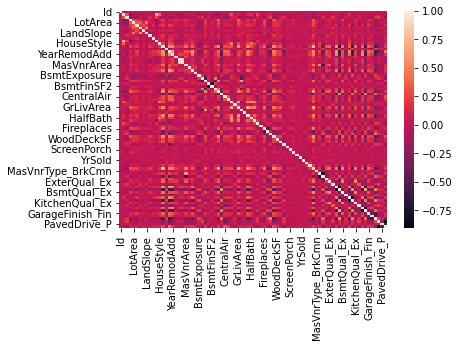

In [82]:
# Корреляция Пирсона между признаками изображена в виде тепловой карты:
sns.heatmap(data.corr())

<AxesSubplot:title={'center':'Корреляция Пирсона между признаками'}>

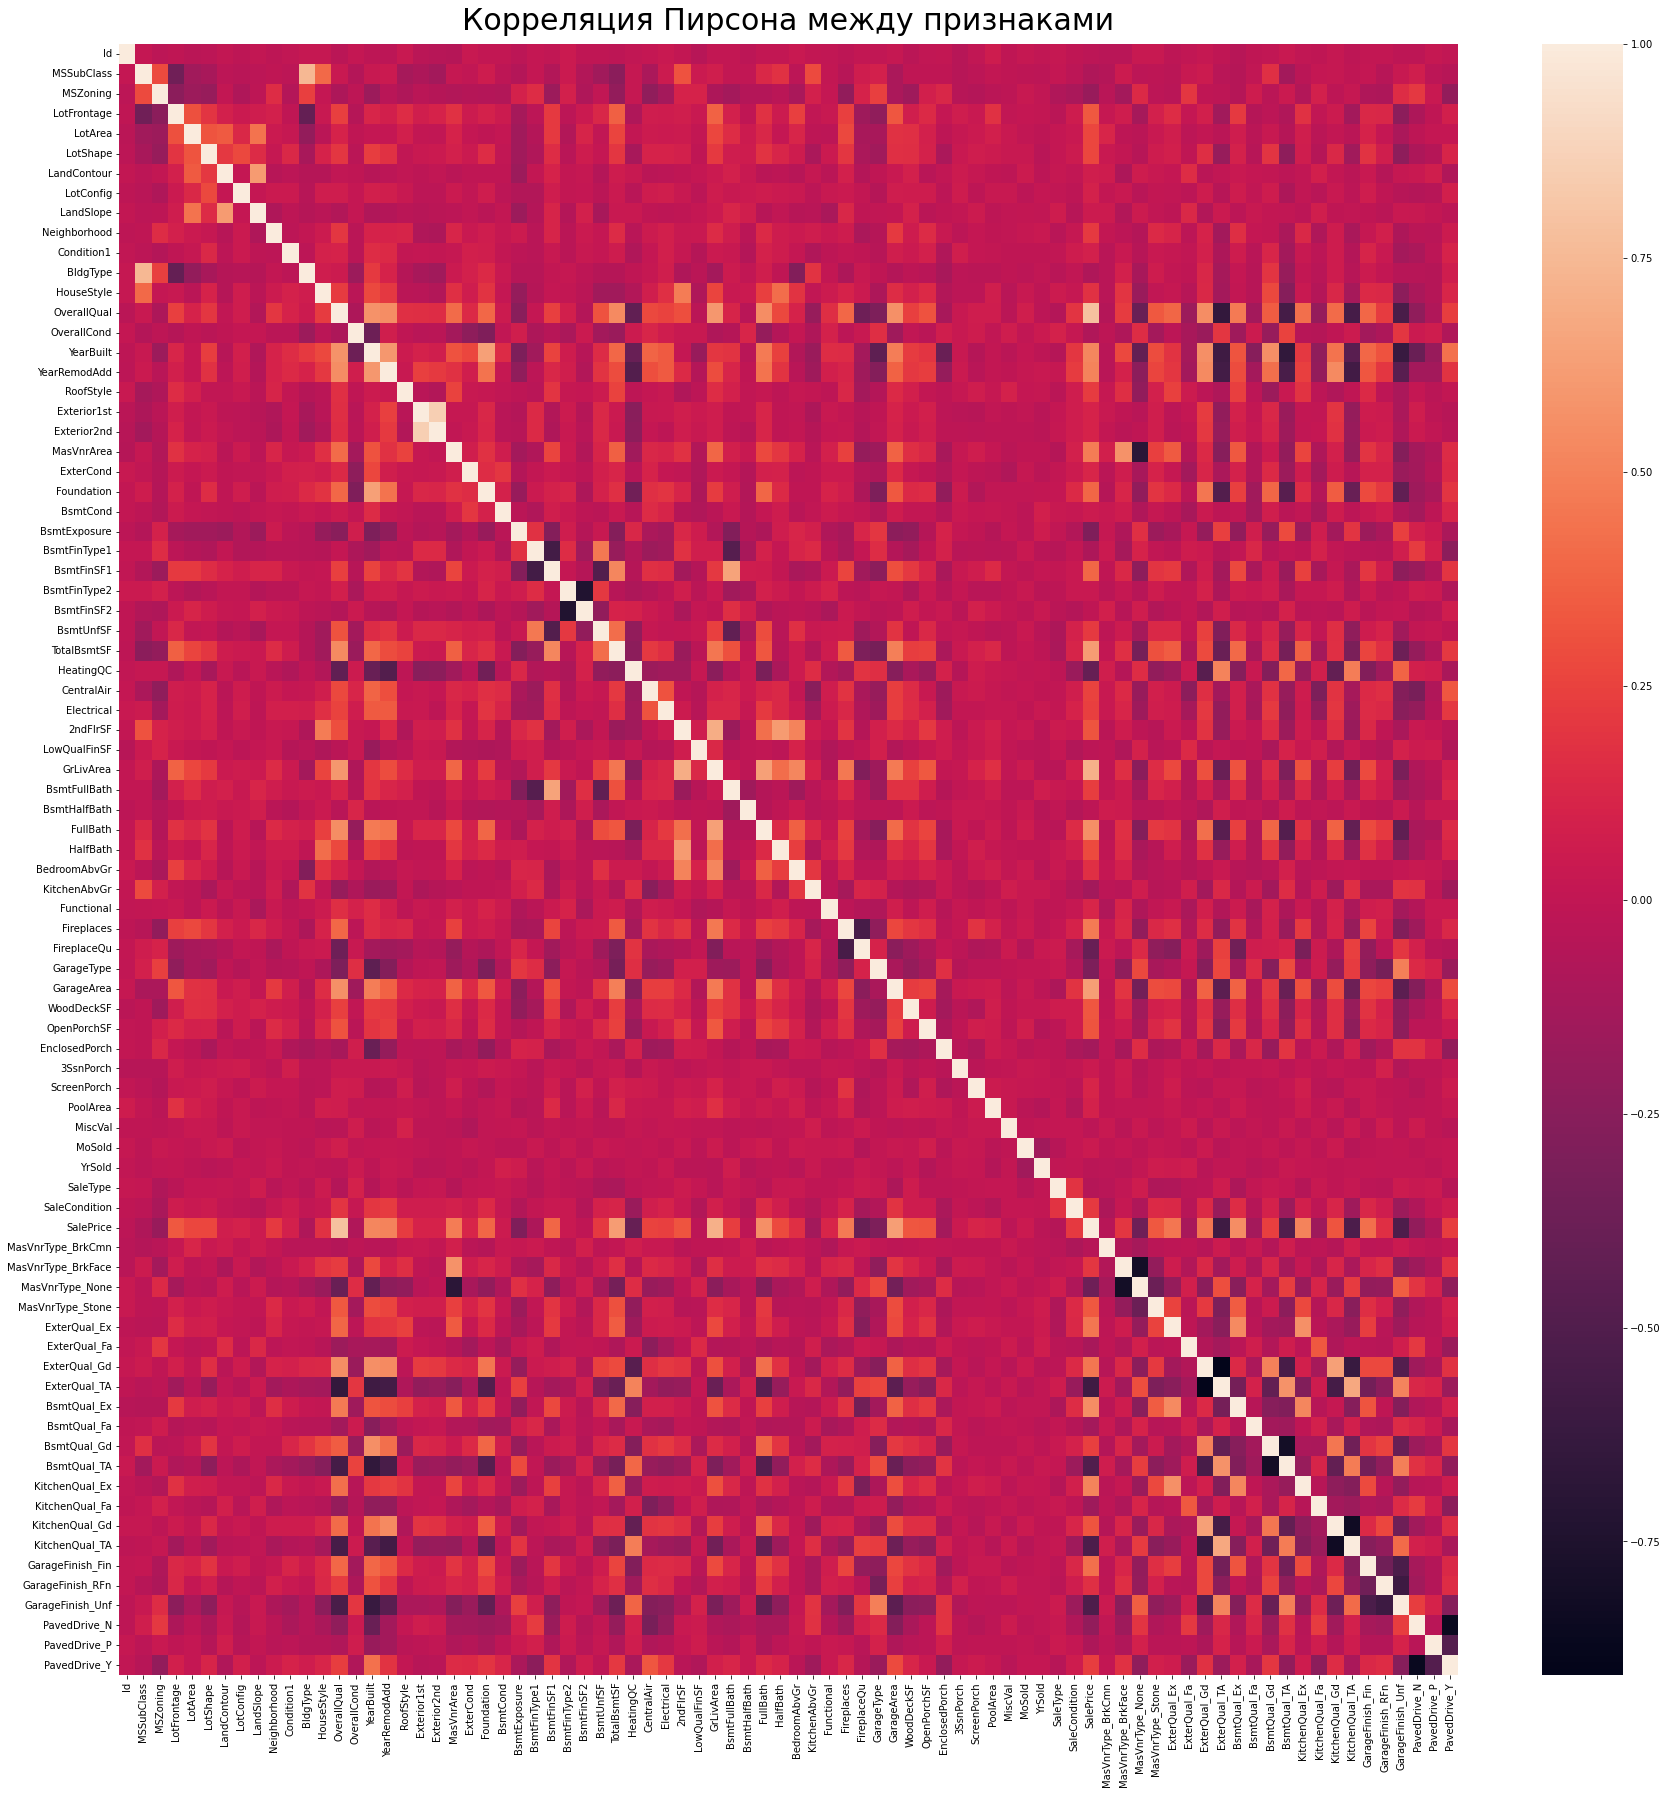

In [83]:
plt.figure(figsize=(30,30))
plt.title('Корреляция Пирсона между признаками', y=1.005, size=30)
sns.heatmap(data.corr())

<AxesSubplot:title={'center':'Корреляция Пирсона между признаками'}>

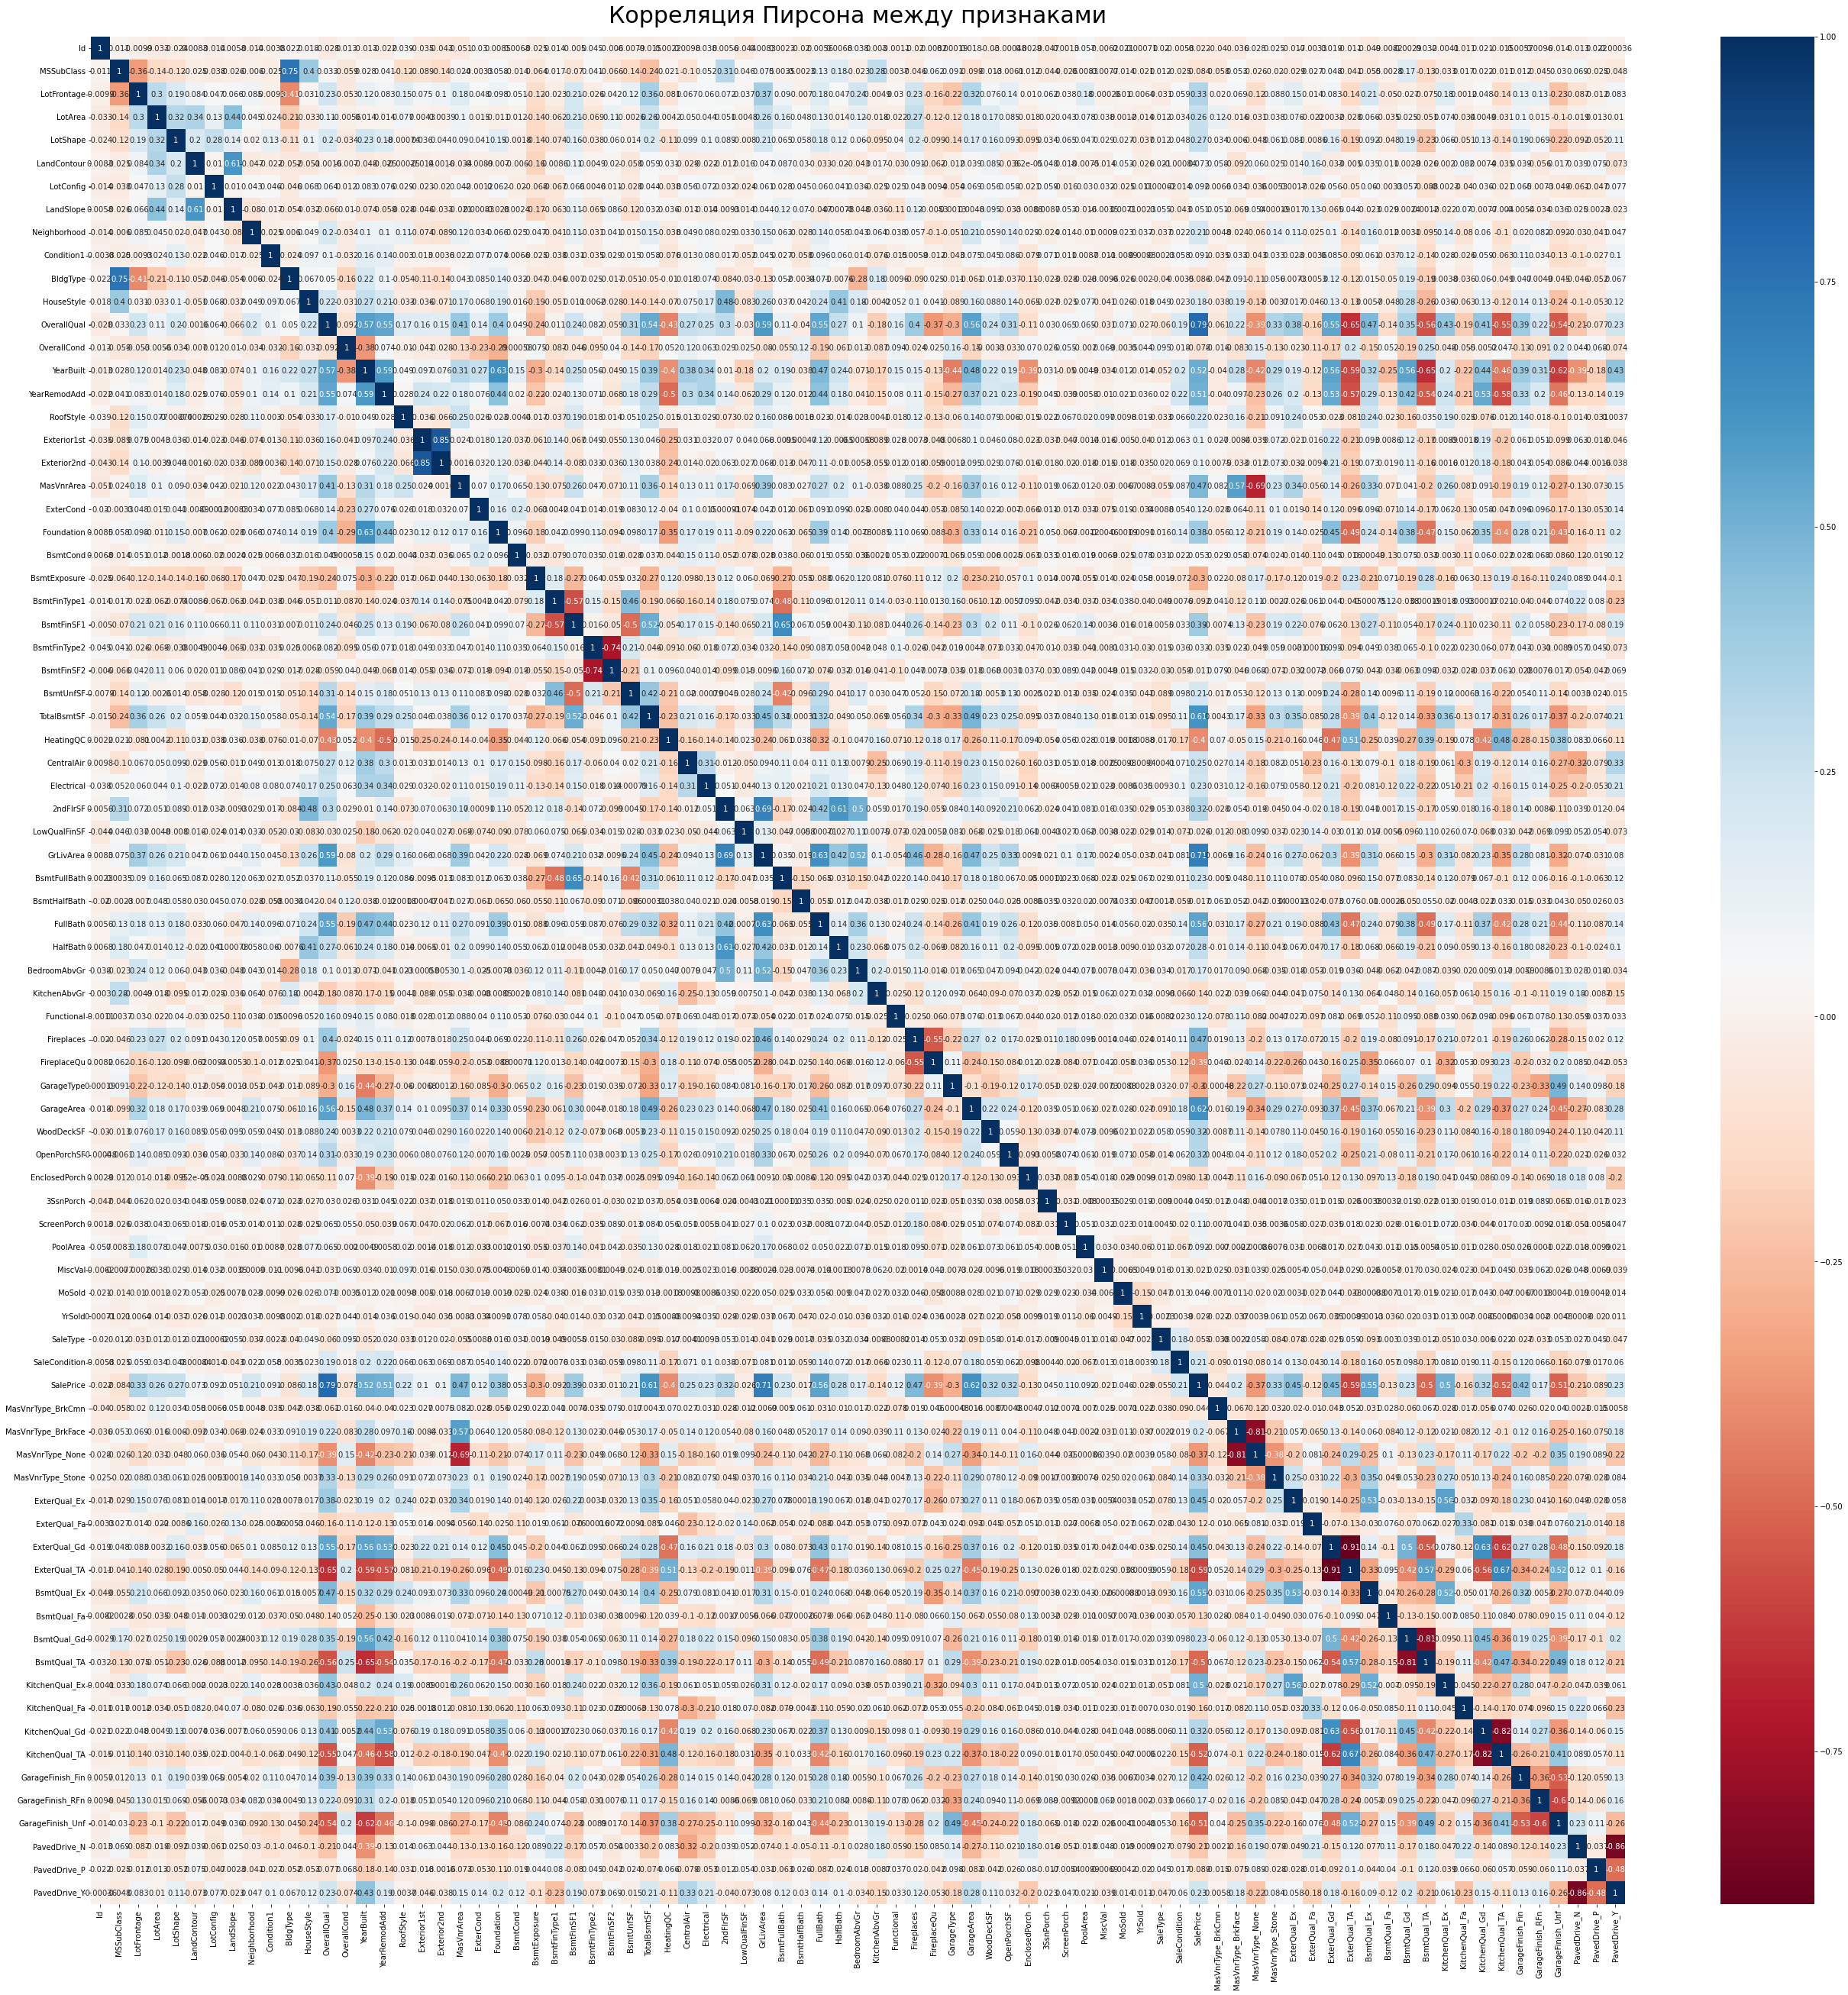

In [1053]:
plt.figure(figsize=(45,45))
plt.title('Корреляция Пирсона между признаками', y=1.005, size=30)
sns.heatmap(data.corr(), cmap=colormap, annot=True)

## 5 (0.5)

Найдите признаки с максимальным и минимальным **абсолютным** значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

*Не забудьте указать название графика и обозначить, что изображено по каждой из осей.*

In [165]:
# Настройки для вывода всех строк, столбцов и символов:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [166]:
# Абсолютное значение корреляции данных с предсказываемым значением
data.corrwith(data['SalePrice']).abs()

Id                    0.021917
MSSubClass            0.084284
MSZoning              0.183642
LotFrontage           0.334771
LotArea               0.263843
LotShape              0.267759
LandContour           0.073042
LotConfig             0.092316
LandSlope             0.051152
Neighborhood          0.210851
Condition1            0.091155
BldgType              0.085591
HouseStyle            0.180163
OverallQual           0.790982
OverallCond           0.077856
YearBuilt             0.522897
YearRemodAdd          0.507101
RoofStyle             0.222405
Exterior1st           0.103551
Exterior2nd           0.103766
MasVnrArea            0.472614
ExterCond             0.117303
Foundation            0.382479
BsmtCond              0.052563
BsmtExposure          0.295407
BsmtFinType1          0.092106
BsmtFinSF1            0.386420
BsmtFinType2          0.033235
BsmtFinSF2            0.011378
BsmtUnfSF             0.214479
TotalBsmtSF           0.613581
HeatingQC             0.400178
CentralA

In [167]:
# Первый элемент, а не нулевой, так как первый (самый максимальный) - это корреляция предсказываемого значения самого с собой, равная 1
max_value = data.corrwith(data['SalePrice']).abs().sort_values(ascending=False)[1]
max_index = data.corrwith(data['SalePrice']).abs().sort_values(ascending=False).index[1]

In [168]:
print('Признак', max_index,
      'с максимальным абсолютным значением коэффициента корреляции Пирсона с предсказываемым значением SalePrice, равным', max_value)

Признак OverallQual с максимальным абсолютным значением коэффициента корреляции Пирсона с предсказываемым значением SalePrice, равным 0.7909816005838046


In [169]:
# Последний элемент сортировки по убыванию:
min_value = data.corrwith(data['SalePrice']).abs().sort_values(ascending=False)[-1]
min_index = data.corrwith(data['SalePrice']).abs().sort_values(ascending=False).index[-1]

# Альтернатива:
# Первый элемент сортировки по возрастанию:
# min_value = data.corrwith(data['SalePrice']).abs().sort_values()[0]
# min_index = data.corrwith(data['SalePrice']).abs().sort_values().index[0]

In [170]:
print('Признак', min_index,
      'с минимальным абсолютным значением коэффициента корреляции Пирсона с предсказываемым значением SalePrice, равным', min_value)

Признак BsmtFinSF2 с минимальным абсолютным значением коэффициента корреляции Пирсона с предсказываемым значением SalePrice, равным 0.011378121450215144


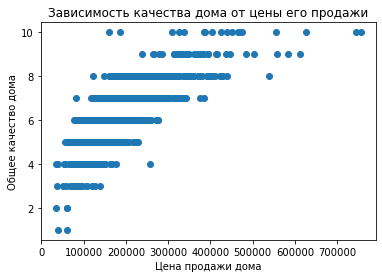

In [171]:
plt.scatter(data['SalePrice'], data['OverallQual'])
plt.title('Зависимость качества дома от цены его продажи')
plt.xlabel('Цена продажи дома')
plt.ylabel('Общее качество дома')
plt.show()

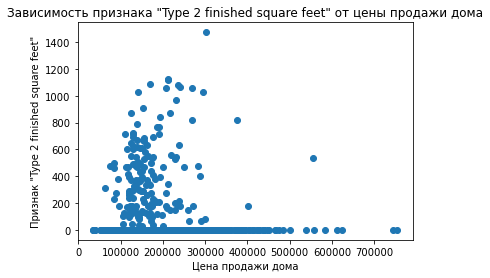

In [172]:
plt.scatter(data['SalePrice'], data['BsmtFinSF2'])
plt.title('Зависимость признака "Type 2 finished square feet" от цены продажи дома')
plt.xlabel('Цена продажи дома')
plt.ylabel('Признак "Type 2 finished square feet"')
plt.show()

## 6 (1)

Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также "смещения" распределения переменной в сторону нормального (что бывает полезно при статистическом анализе), можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). В данном случае воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

*В дальнейшем используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.*

In [330]:
y = data['SalePrice']
data_1 = data.copy()
data_1 = data_1.drop(['SalePrice'], axis=1)

In [174]:
# Настройки для вывода ограниченного числа строк, столбцов и символов:
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', None)

In [331]:
# Использование встроенной функции для преобразования ln(1 + 𝑦):
y = np.log1p(y)
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

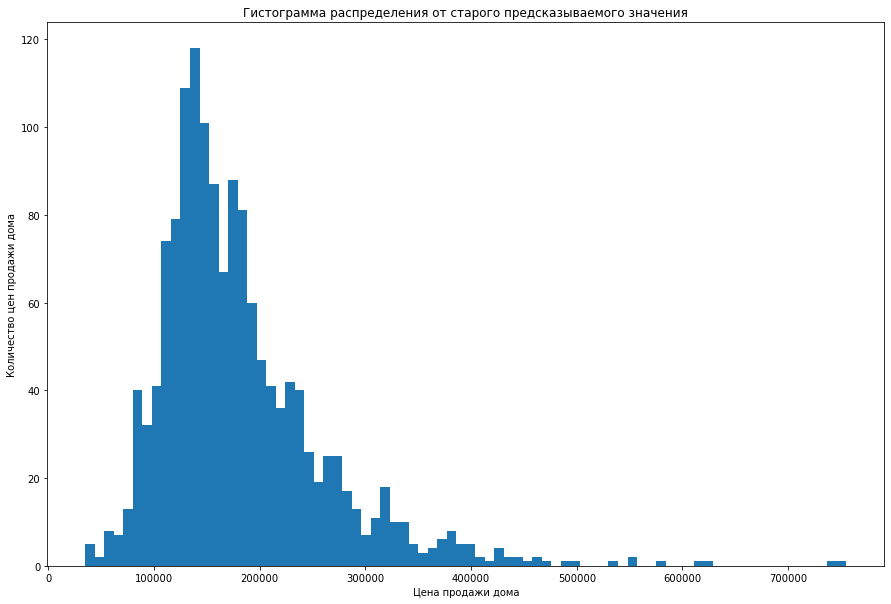

In [176]:
y.plot.hist(figsize=(15, 10), bins=80, title='Гистограмма распределения от старого предсказываемого значения')
plt.xlabel('Цена продажи дома')
plt.ylabel('Количество цен продажи дома')
plt.show()

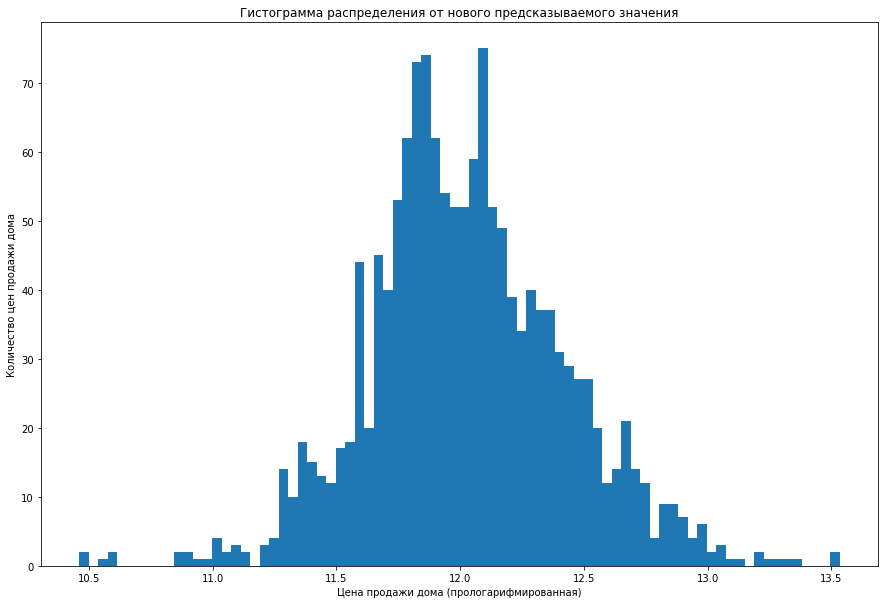

In [177]:
y_1.plot.hist(figsize=(15, 10), bins=80, title='Гистограмма распределения от нового предсказываемого значения')
plt.xlabel('Цена продажи дома (прологарифмированная)')
plt.ylabel('Количество цен продажи дома')
plt.show()

Перейдем непосредственно к построению моделей. Разобьем выборку на обучение и контроль. Причем 75% объектов оставьте на обучение и 25% - на тестовую выборку.

Зафиксируйте при разбиении значение `random_state` = 13. Это потребуется для выполнения последующих заданий

In [334]:
# Использование функции, импортированное в начале практики:
X_train, X_val, y_train, y_val = train_test_split(data_1, y, test_size=0.25, train_size=0.75, random_state=13)

In [335]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1095, 81), (365, 81), (1095,), (365,))

## 7 (1.5)

Примените к данным следующие алгоритмы:

- kNN
- линейная регрессия
- Lasso
- Ridge

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрикам 
- RMSE 
- MAE
- $R^2$

Интерпретируйте полученные результаты.

In [332]:
# Объявление переменных с использованием встроенных алгоритмов, импортированных в начале практики:
knn = KNeighborsRegressor()
lr = LinearRegression()
l = Lasso()
r = Ridge()

In [333]:
# Подбор гиперпараметров с помощью кросс-валидации для kNN:
parameters_knn = GridSearchCV(KNeighborsRegressor(), param_grid={'n_neighbors': range(1, 36, 2), 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]}, cv=5)
parameters_knn.fit(X_train, y_train)
parameters_knn.predict(X_val)
parameters_knn_best = parameters_knn.best_params_

In [234]:
parameters_knn.best_params_

{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

In [336]:
knn_1 = KNeighborsRegressor(n_neighbors=parameters_knn_best['n_neighbors'], weights=parameters_knn_best['weights'], p=parameters_knn_best['p'])
knn_1.fit(X_train, y_train)
y_pred = knn_1.predict(X_val)
print('RMSE для kNN: ', mean_squared_error(y_val, y_pred))
print('MAE для kNN: ', mean_absolute_error(y_val, y_pred))
print('R2 для kNN: ', r2_score(y_val, y_pred))

RMSE для kNN:  0.05265928641193883
MAE для kNN:  0.16001161526460014
R2 для kNN:  0.6810340095118681


In [337]:
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_val)
print('RMSE для kNN: ', mean_squared_error(y_val, pred_knn))
print('MAE для kNN: ', mean_absolute_error(y_val, pred_knn))
print('R2 для kNN: ', r2_score(y_val, pred_knn))

RMSE для kNN:  0.056601281265575565
MAE для kNN:  0.1699842276652597
R2 для kNN:  0.6571566959616356


In [338]:
# Подбор гиперпараметров с помощью кросс-валидации для линейной регрессии:
parameters_lr = GridSearchCV(LinearRegression(), param_grid={'fit_intercept': [True, False], 'normalize': [True, False]}, cv=7)
parameters_lr.fit(X_train, y_train)
parameters_lr.predict(X_val)
parameters_lr_best = parameters_lr.best_params_

In [339]:
parameters_lr.best_params_

{'fit_intercept': True, 'normalize': True}

In [340]:
lr_1 = LinearRegression(fit_intercept=parameters_lr_best['fit_intercept'], normalize=parameters_lr_best['normalize'])
lr_1.fit(X_train, y_train)
y_pred = lr_1.predict(X_val)
print('RMSE для линейной регрессии: ', mean_squared_error(y_val, y_pred))
print('MAE для линейной регрессии: ', mean_absolute_error(y_val, y_pred))
print('R2 для линейной регрессии: ', r2_score(y_val, y_pred))

RMSE для линейной регрессии:  0.05343199282037286
MAE для линейной регрессии:  0.106208804348993
R2 для линейной регрессии:  0.6763535992420698


In [341]:
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_val)
print('RMSE для линейной регрессии: ', mean_squared_error(y_val, pred_lr))
print('MAE для линейной регрессии: ', mean_absolute_error(y_val, pred_lr))
print('R2 для линейной регрессии: ', r2_score(y_val, pred_lr))

RMSE для линейной регрессии:  0.05344845481110358
MAE для линейной регрессии:  0.10621547798784715
R2 для линейной регрессии:  0.6762538862467635


In [355]:
# Подбор гиперпараметров с помощью кросс-валидации для Lasso:
parameters_l = GridSearchCV(Lasso(), {'alpha': np.logspace(-2, 2, 20), 'fit_intercept': [True, False], 'normalize': [True, False]}, cv=5)
parameters_l.fit(X_train, y_train)
parameters_l.predict(X_val)
parameters_l_best = parameters_l.best_params_

C:\Users\harri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.907639897468925, tolerance: 12.668450261551605
  model = cd_fast.enet_coordinate_descent(
C:\Users\harri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.907639897468925, tolerance: 12.668450261551605
  model = cd_fast.enet_coordinate_descent(


In [356]:
parameters_l.best_params_

{'alpha': 0.01, 'fit_intercept': True, 'normalize': False}

In [357]:
l_1 = Lasso(alpha=parameters_l_best['alpha'], fit_intercept=parameters_l_best['fit_intercept'], normalize=parameters_l_best['normalize'])
l_1.fit(X_train, y_train)
y_pred = l_1.predict(X_val)
print('RMSE для Lasso: ', mean_squared_error(y_val, y_pred))
print('MAE для Lasso: ', mean_absolute_error(y_val, y_pred))
print('R2 для Lasso: ', r2_score(y_val, y_pred))

RMSE для Lasso:  0.05912932579413526
MAE для Lasso:  0.10782306366399548
R2 для Lasso:  0.6418439129371523


In [358]:
l.fit(X_train, y_train)
pred_l = l.predict(X_val)
print('RMSE для Lasso: ', mean_squared_error(y_val, pred_l))
print('MAE для Lasso: ', mean_absolute_error(y_val, pred_l))
print('R2 для Lasso: ', r2_score(y_val, pred_l))

RMSE для Lasso:  0.08428771474706276
MAE для Lasso:  0.1452668612266399
R2 для Lasso:  0.48945539804765203


In [346]:
# Подбор гиперпараметров с помощью кросс-валидации для Ridge:
parameters_r = GridSearchCV(Ridge(), {'alpha': np.logspace(-2, 2, 20), 'fit_intercept': [True, False], 'normalize': [True, False]}, cv=5)
parameters_r.fit(X_train, y_train)
parameters_r.predict(X_val)
parameters_r_best = parameters_r.best_params_

In [347]:
parameters_r.best_params_

{'alpha': 37.92690190732246, 'fit_intercept': True, 'normalize': False}

In [348]:
r_1 = Ridge(alpha=parameters_r_best['alpha'], fit_intercept=parameters_r_best['fit_intercept'], normalize=parameters_r_best['normalize'])
r_1.fit(X_train, y_train)
y_pred = r_1.predict(X_val)
print('RMSE для Lasso: ', mean_squared_error(y_val, y_pred))
print('MAE для Lasso: ', mean_absolute_error(y_val, y_pred))
print('R2 для Lasso: ', r2_score(y_val, y_pred))

RMSE для Lasso:  0.05423837110955081
MAE для Lasso:  0.10510884084453216
R2 для Lasso:  0.6714692328322459


In [349]:
r.fit(X_train, y_train)
pred_r = r.predict(X_val)
print('RMSE для Ridge: ', mean_squared_error(y_val, pred_r))
print('MAE для Ridge: ', mean_absolute_error(y_val, pred_r))
print('R2 для Ridge: ', r2_score(y_val, pred_r))

RMSE для Ridge:  0.053461207793657685
MAE для Ridge:  0.1061293798071721
R2 для Ridge:  0.6761766393262445


## 8 (1)

Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения. В чем различия между полученными наборами весов и почему?

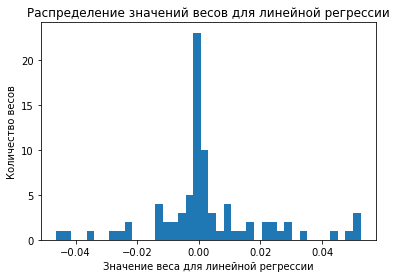

In [350]:
lr_1 = LinearRegression()
lr_1.fit(X_train, y_train)
lr_weights = lr_1.coef_

plt.hist(lr_weights, bins=40)
plt.title('Распределение значений весов для линейной регрессии')
plt.xlabel('Значение веса для линейной регрессии')
plt.ylabel('Количество весов')
plt.show()


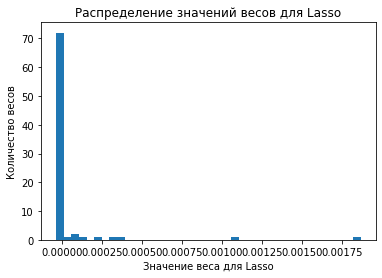

In [360]:
l_1 = Lasso()
l_1.fit(X_train, y_train)
l_weights = l_1.coef_

plt.hist(l_weights, bins=40)
plt.title('Распределение значений весов для Lasso')
plt.xlabel('Значение веса для Lasso')
plt.ylabel('Количество весов')
plt.show()

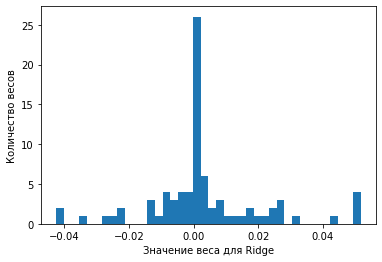

In [353]:
r_1 = Ridge()
r_1.fit(X_train, y_train)
r_weights = r_1.coef_

plt.hist(r_weights, bins=40)
plt.xlabel('Значение веса для Ridge')
plt.ylabel('Количество весов')
plt.show()

In [ ]:
# Значения функций Ridge и линейной регрессии имеют стандартную нормализацию с увеличением количества значений весов в 0
# (распределение со средним значением 0)
# У функции Lasso также большая часть значений сосредоточены в 0, однако у нее только положительные значения
# Также это говорит о больших данных

## 9 (0.5)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.212 на валидации по метрике RMSE (если вы дошли до этого задания, а качество выше уже удовлетворяет этому условию, вы автоматически получите за него полный балл).

In [ ]:
# Сделано

## 10* (1)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.210 на валидации по метрике RMSE. Для этого вы можете использовать самые разные методы, какие захотите - отбор признаков, генерация новых, разные способы предобработки данных. Единственное ограничение - не использовать никакие алгоритмы регрессии, кроме kNN, линейной регрессии, Lasso и Ridge.

In [ ]:
# Сделано